## Import library

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

## Data

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
app_train = pd.read_csv("drive/MyDrive/Colab Notebooks/Rakamin/Home Credit/application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
app_test = pd.read_csv("drive/MyDrive/Colab Notebooks/Rakamin/Home Credit/application_test.csv")
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
app_train.shape

(307511, 122)

In [179]:
app_test.shape

(48744, 121)

In [180]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [181]:
app_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


## Exploration Data Analysis

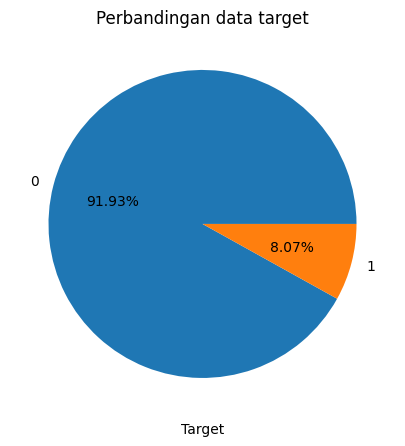

In [188]:
fig = plt.figure(figsize=(7,5))

data = app_train.groupby("TARGET")["TARGET"].count()
plt.pie(data, labels=data.index, autopct="%.2f%%")
plt.xlabel("Target")
plt.title("Perbandingan data target")
fig.figure.savefig("Perbandingan data target.png")

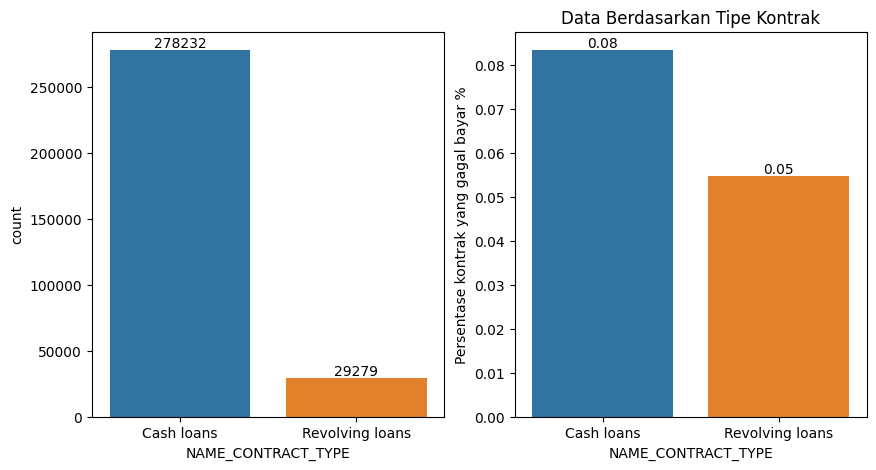

In [189]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=app_train, x="NAME_CONTRACT_TYPE", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
plt.ylabel("Jumlah kontrak secara keseluruhan")
ax[0].figure.savefig("Data Berdasarkan Tipe Kontrak (1).png")

target = app_train[["NAME_CONTRACT_TYPE", "TARGET"]].groupby(["NAME_CONTRACT_TYPE"], as_index=False).mean()
sns.barplot(target, x="NAME_CONTRACT_TYPE", y="TARGET", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
plt.ylabel("Persentase kontrak yang gagal bayar %")
plt.title("Data Berdasarkan Tipe Kontrak")
ax[1].figure.savefig("Data Berdasarkan Tipe Kontrak (2).png")

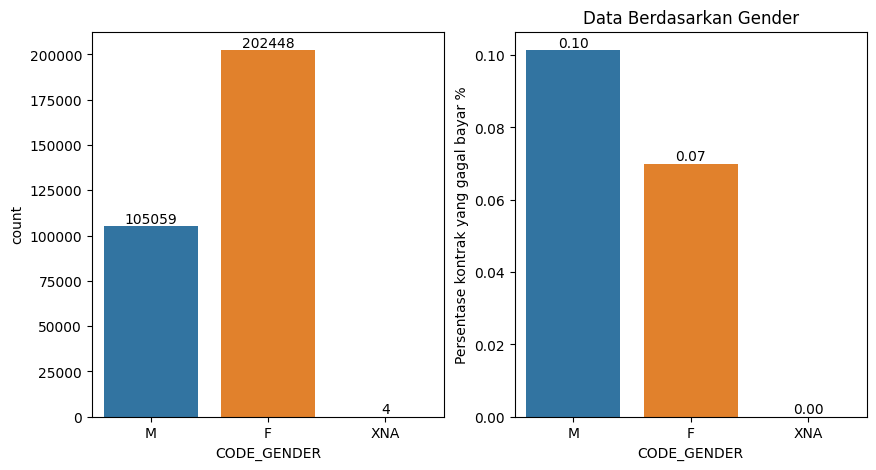

In [190]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=app_train, x="CODE_GENDER", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
plt.ylabel("Jumlah kontrak secara keseluruhan")
ax[0].figure.savefig("Data Berdasarkan Gender (1).png")

target = app_train[["CODE_GENDER", "TARGET"]].groupby(["CODE_GENDER"], as_index=False).mean()
sns.barplot(target, x="CODE_GENDER", y="TARGET", order=["M", "F", "XNA"], ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
plt.ylabel("Persentase kontrak yang gagal bayar %")
plt.title("Data Berdasarkan Gender")
ax[1].figure.savefig("Data Berdasarkan Gender (2).png")

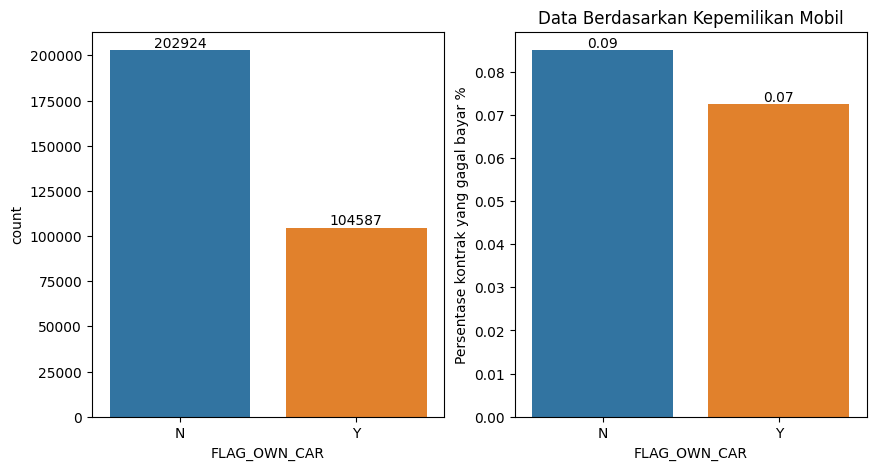

In [193]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=app_train, x="FLAG_OWN_CAR", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
plt.ylabel("Jumlah kontrak secara keseluruhan")

target = app_train[["FLAG_OWN_CAR", "TARGET"]].groupby(["FLAG_OWN_CAR"], as_index=False).mean()
sns.barplot(target, x="FLAG_OWN_CAR", y="TARGET", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
plt.ylabel("Persentase kontrak yang gagal bayar %")
plt.title("Data Berdasarkan Kepemilikan Mobil")
ax[1].figure.savefig("Data Berdasarkan Kepemilikan Mobil.png")

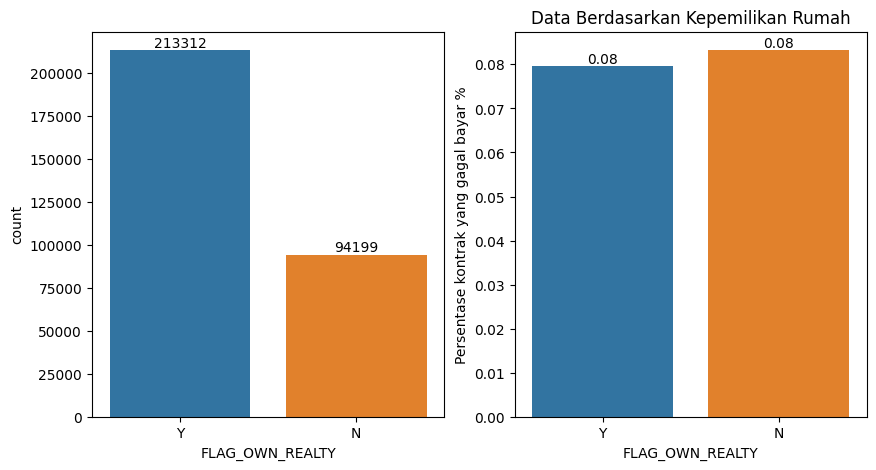

In [196]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=app_train, x="FLAG_OWN_REALTY", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
plt.ylabel("Jumlah kontrak secara keseluruhan")

target = app_train[["FLAG_OWN_REALTY", "TARGET"]].groupby(["FLAG_OWN_REALTY"], as_index=False).mean()
sns.barplot(target, x="FLAG_OWN_REALTY", y="TARGET", order=["Y", "N"], ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
plt.ylabel("Persentase kontrak yang gagal bayar %")
plt.title("Data Berdasarkan Kepemilikan Rumah")
ax[1].figure.savefig("Data Berdasarkan Kepemilikan Rumah.png")

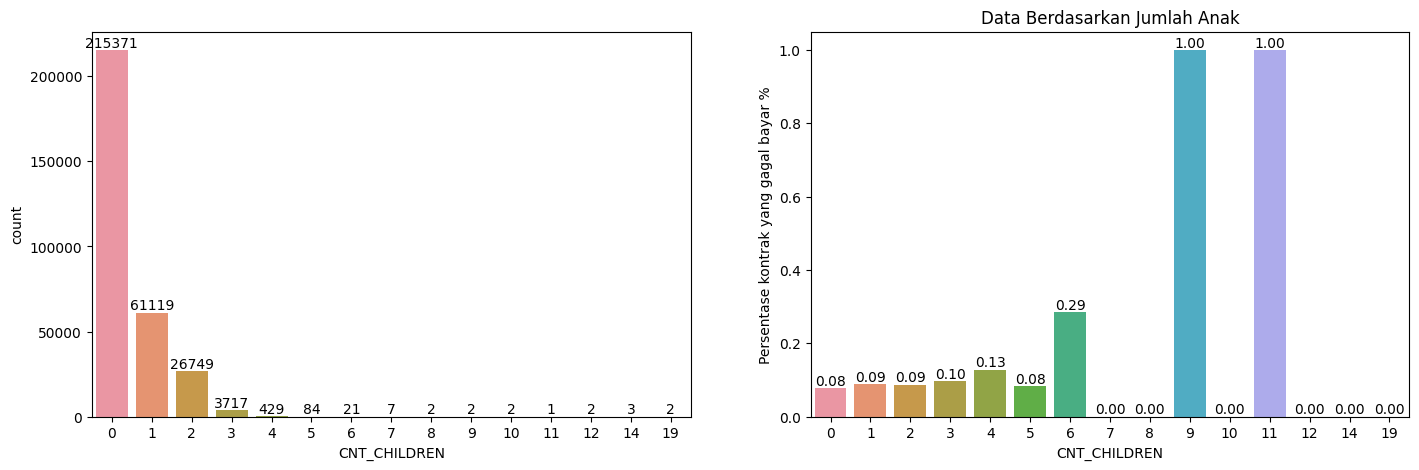

In [197]:
fig, ax = plt.subplots(1,2, figsize=(17,5))
sns.countplot(data=app_train, x="CNT_CHILDREN", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
plt.ylabel("Jumlah kontrak secara keseluruhan")
ax[0].figure.savefig("Data Berdasarkan Jumlah Anak (1).png")

target = app_train[["CNT_CHILDREN", "TARGET"]].groupby(["CNT_CHILDREN"], as_index=False).mean()
sns.barplot(target, x="CNT_CHILDREN", y="TARGET", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
plt.ylabel("Persentase kontrak yang gagal bayar %")
plt.title("Data Berdasarkan Jumlah Anak")
ax[1].figure.savefig("Data Berdasarkan Jumlah Anak (2).png")

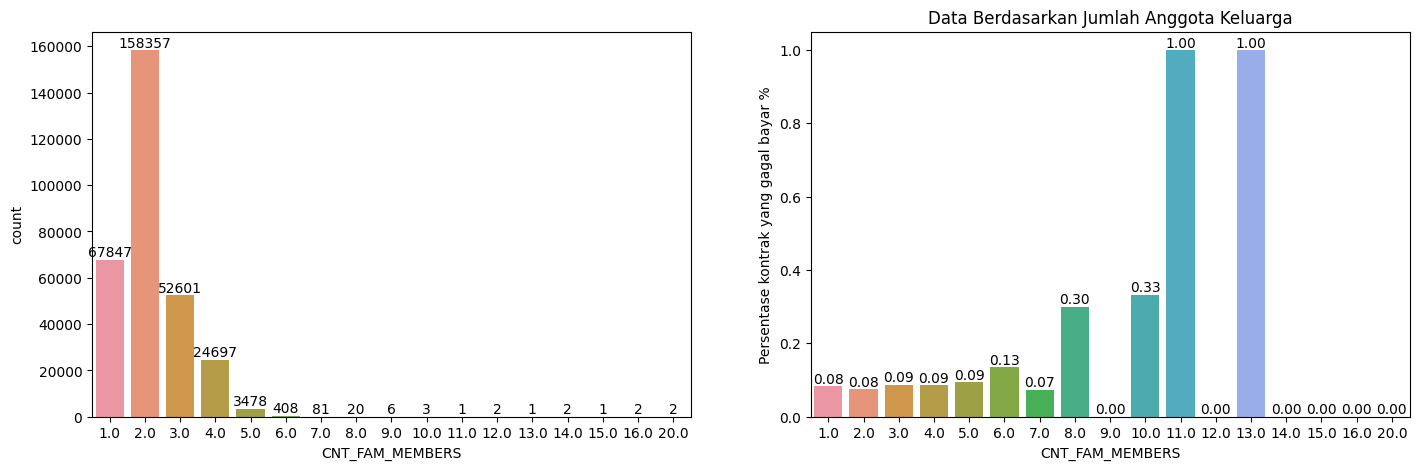

In [198]:
fig, ax = plt.subplots(1,2, figsize=(17,5))
sns.countplot(data=app_train, x="CNT_FAM_MEMBERS", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
plt.ylabel("Jumlah kontrak secara keseluruhan")
ax[0].figure.savefig("Data Berdasarkan Jumlah Anggota Keluarga (1).png")

target = app_train[["CNT_FAM_MEMBERS", "TARGET"]].groupby(["CNT_FAM_MEMBERS"], as_index=False).mean()
sns.barplot(target, x="CNT_FAM_MEMBERS", y="TARGET", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
plt.ylabel("Persentase kontrak yang gagal bayar %")
plt.title("Data Berdasarkan Jumlah Anggota Keluarga")
ax[1].figure.savefig("Data Berdasarkan Jumlah Anggota Keluarga (2).png")

Text(0, 0.5, 'Persentase kontrak yang gagal bayar %')

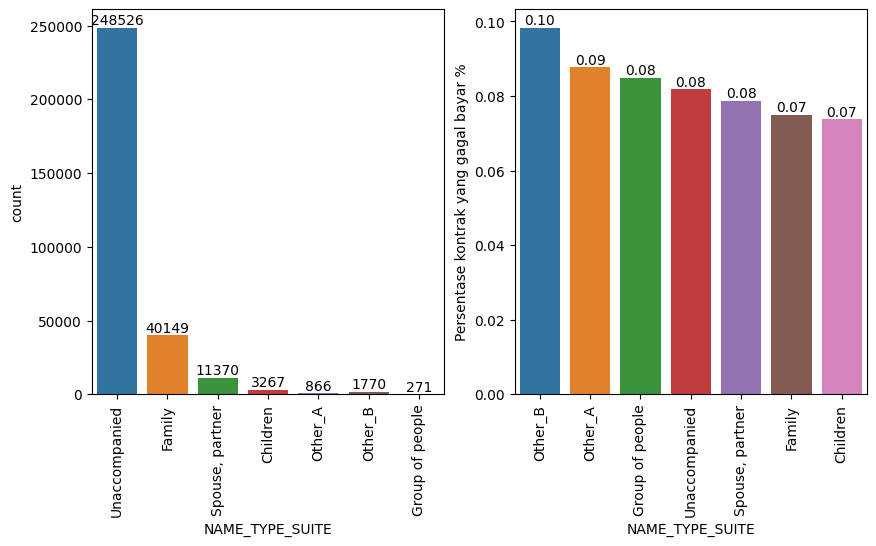

In [199]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=app_train, x="NAME_TYPE_SUITE", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].tick_params(axis="x", rotation=90)
plt.ylabel("Jumlah kontrak secara keseluruhan")

target = app_train[["NAME_TYPE_SUITE", "TARGET"]].groupby(["NAME_TYPE_SUITE"], as_index=False).mean().sort_values("TARGET", ascending=False)
sns.barplot(target, x="NAME_TYPE_SUITE", y="TARGET", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
ax[1].tick_params(axis="x", rotation=90)
plt.ylabel("Persentase kontrak yang gagal bayar %")

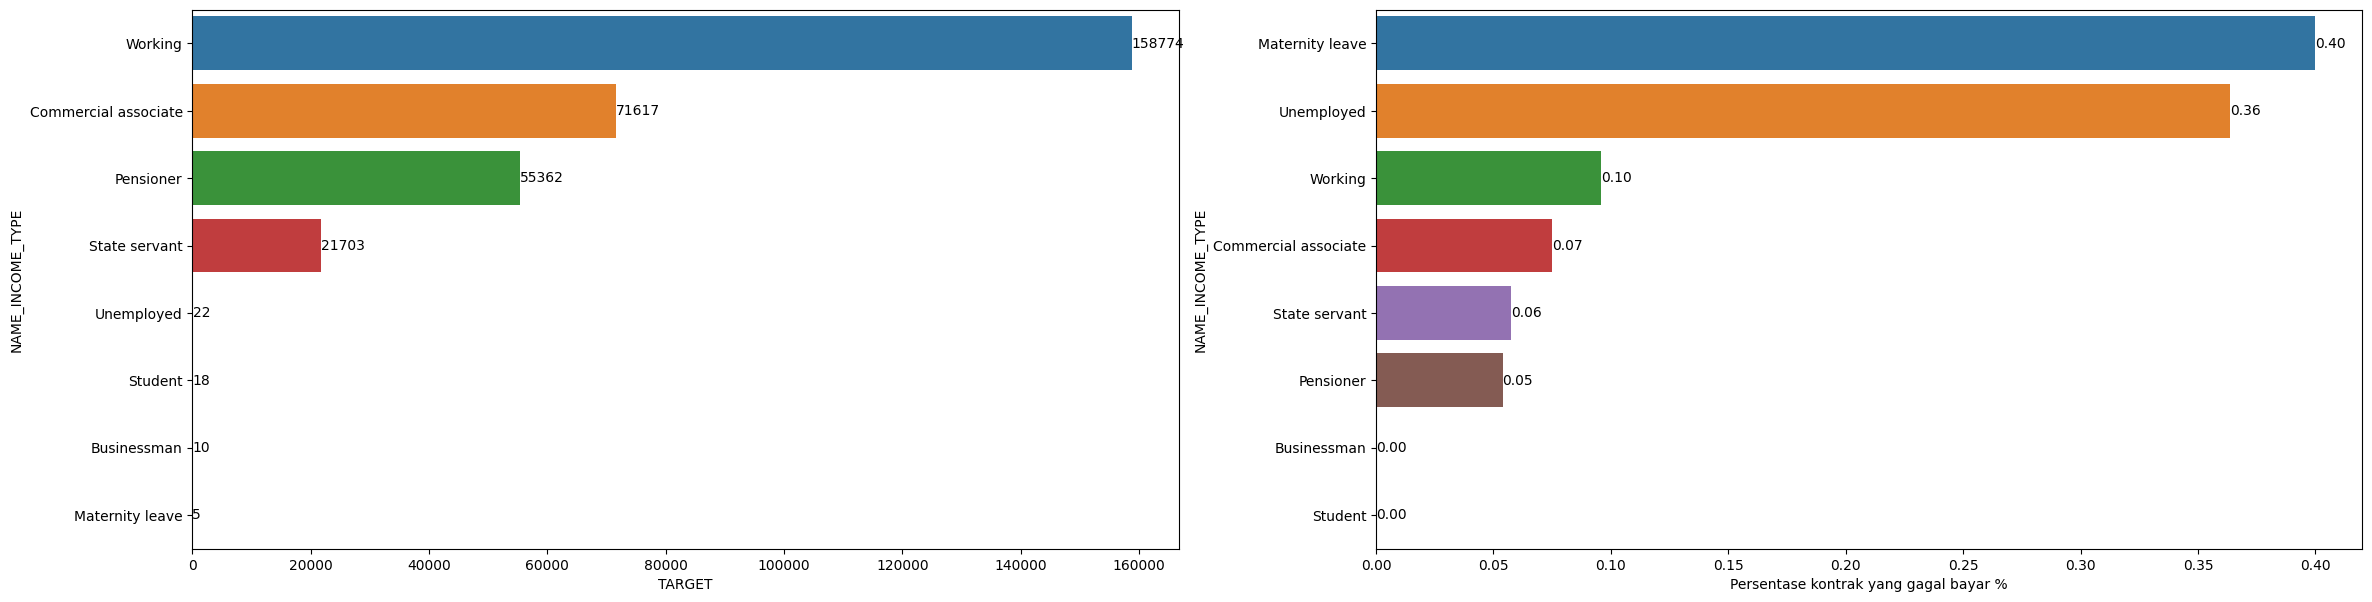

In [200]:
fig, ax = plt.subplots(1,2, figsize=(28,7))
count = app_train[["NAME_INCOME_TYPE", "TARGET"]].groupby(["NAME_INCOME_TYPE"], as_index=False).count().sort_values("TARGET", ascending=False)
sns.barplot(count, y="NAME_INCOME_TYPE", x="TARGET", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
plt.xlabel("Jumlah kontrak secara keseluruhan")
ax[0].figure.savefig("Data Berdasarkan Tipe income dan target (1).png")

mean = app_train[["NAME_INCOME_TYPE", "TARGET"]].groupby(["NAME_INCOME_TYPE"], as_index=False).mean().sort_values("TARGET", ascending=False)
sns.barplot(mean, y="NAME_INCOME_TYPE", x="TARGET", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
plt.xlabel("Persentase kontrak yang gagal bayar %")
ax[1].figure.savefig("Data Berdasarkan Tipe income dan target (2).png")

Text(0, 0.5, 'Jumlah kontrak secara keseluruhan')

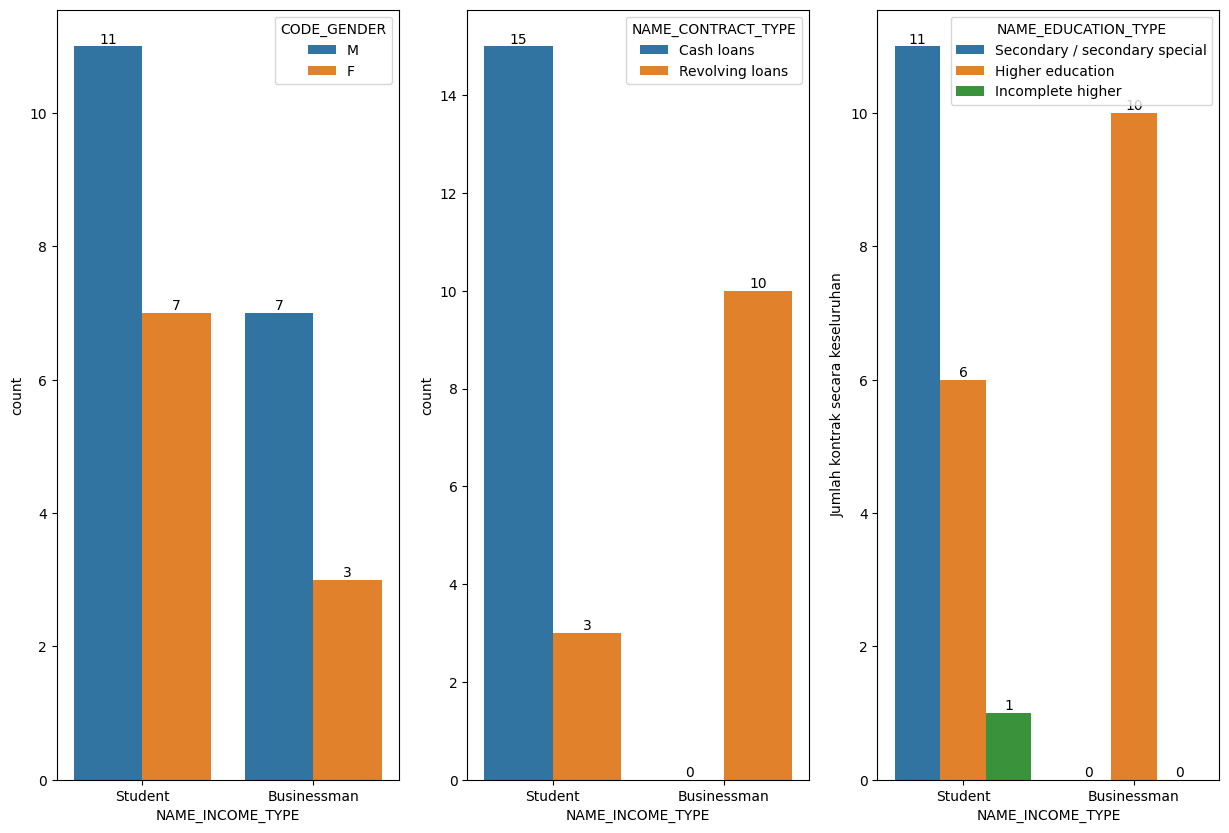

In [201]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
data = app_train[app_train["NAME_INCOME_TYPE"].isin(["Student", "Businessman"])]
sns.countplot(data=data, x="NAME_INCOME_TYPE", hue="CODE_GENDER", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
plt.ylabel("Jumlah kontrak secara keseluruhan")

sns.countplot(data=data, x="NAME_INCOME_TYPE", hue="NAME_CONTRACT_TYPE", ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])
plt.ylabel("Jumlah kontrak secara keseluruhan")

sns.countplot(data=data, x="NAME_INCOME_TYPE", hue="NAME_EDUCATION_TYPE", ax=ax[2])
ax[2].bar_label(ax[2].containers[0])
ax[2].bar_label(ax[2].containers[1])
ax[2].bar_label(ax[2].containers[2])
plt.ylabel("Jumlah kontrak secara keseluruhan")

Text(0, 0.5, 'Persentase kontrak yang gagal bayar %')

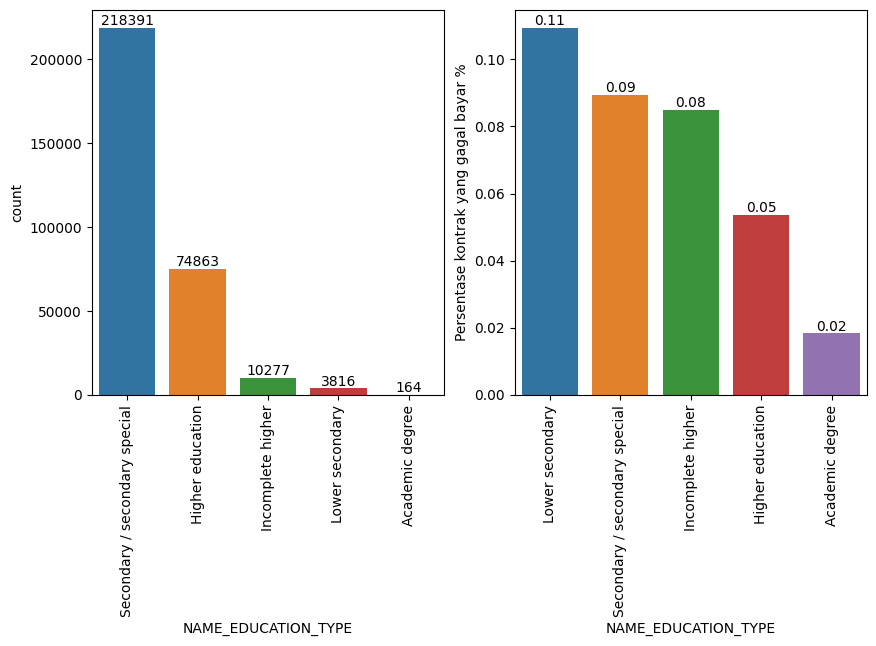

In [202]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=app_train, x="NAME_EDUCATION_TYPE", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].tick_params(axis="x", rotation=90)
plt.ylabel("Jumlah kontrak secara keseluruhan")

target = app_train[["NAME_EDUCATION_TYPE", "TARGET"]].groupby(["NAME_EDUCATION_TYPE"], as_index=False).mean().sort_values("TARGET", ascending=False)
sns.barplot(target, x="NAME_EDUCATION_TYPE", y="TARGET", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
ax[1].tick_params(axis="x", rotation=90)
plt.ylabel("Persentase kontrak yang gagal bayar %")

Text(0, 0.5, 'Persentase kontrak yang gagal bayar %')

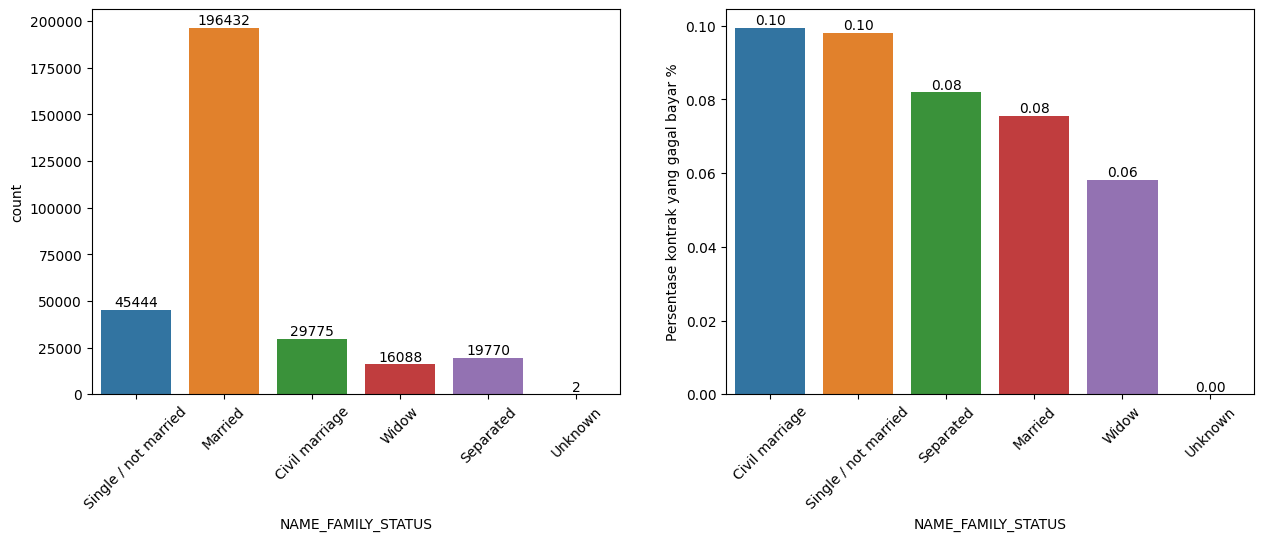

In [203]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=app_train, x="NAME_FAMILY_STATUS", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].tick_params(axis="x", rotation=45)
plt.ylabel("Jumlah kontrak secara keseluruhan")

target = app_train[["NAME_FAMILY_STATUS", "TARGET"]].groupby(["NAME_FAMILY_STATUS"], as_index=False).mean().sort_values("TARGET", ascending=False)
sns.barplot(target, x="NAME_FAMILY_STATUS", y="TARGET", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
ax[1].tick_params(axis="x", rotation=45)
plt.ylabel("Persentase kontrak yang gagal bayar %")

Text(0.5, 0, 'Persentase kontrak yang gagal bayar %')

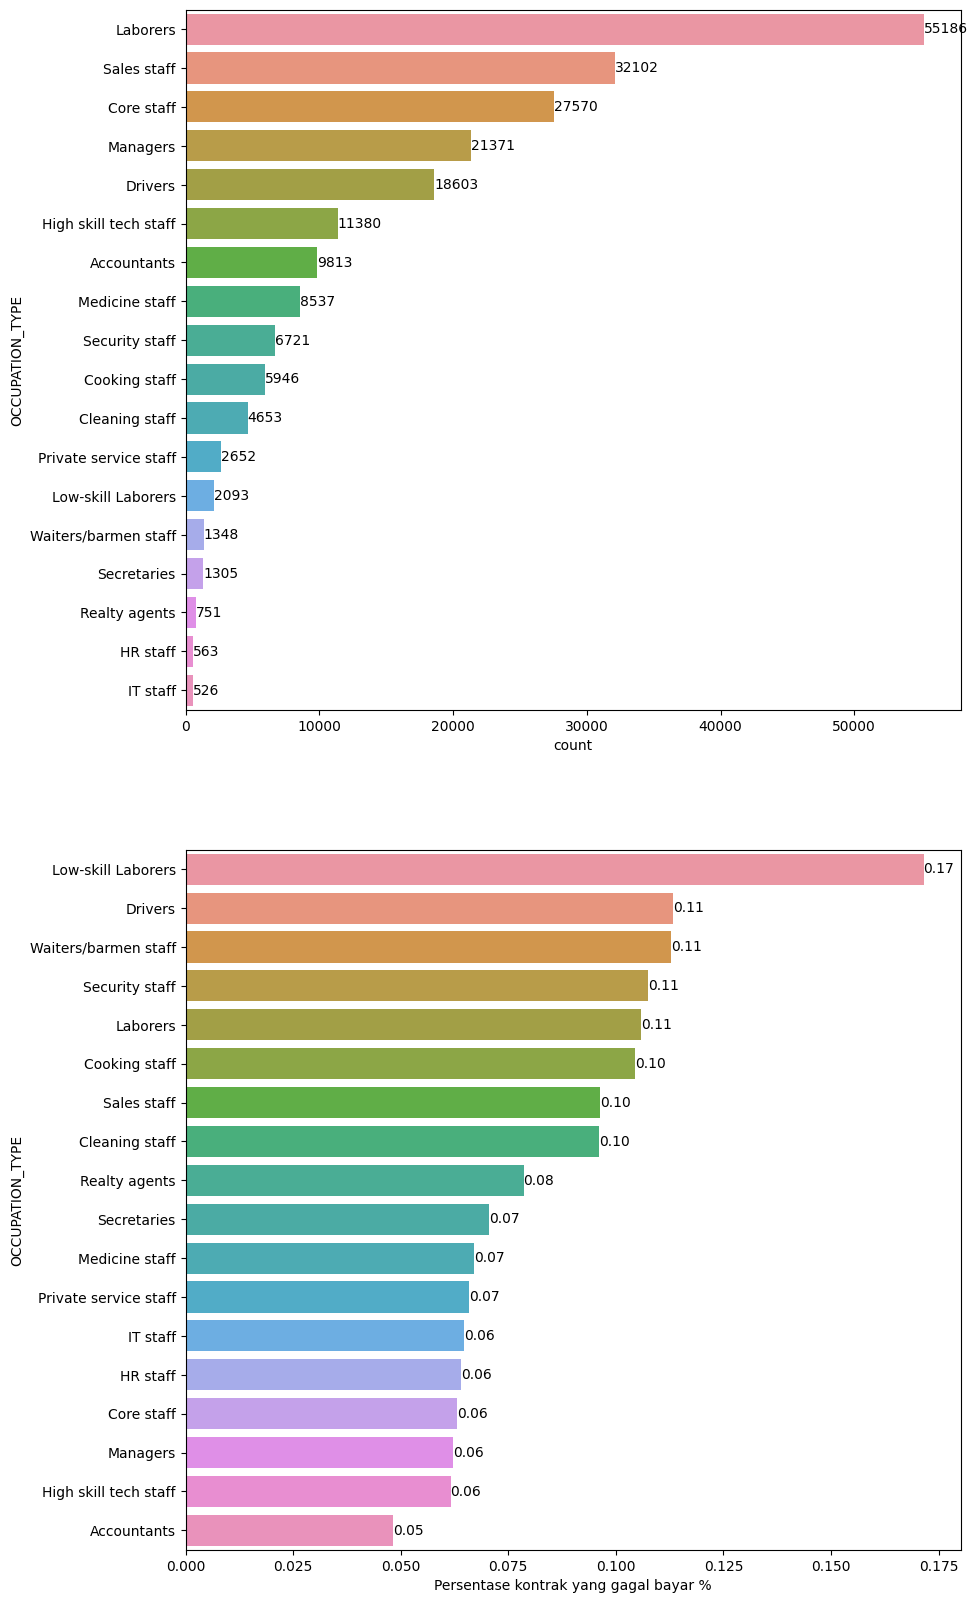

In [204]:
fig, ax = plt.subplots(2,1, figsize=(10,20))
sns.countplot(data=app_train, y='OCCUPATION_TYPE', order=app_train["OCCUPATION_TYPE"].value_counts().index, ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
plt.xlabel("Jumlah kontrak secara keseluruhan")

target = app_train[["OCCUPATION_TYPE", "TARGET"]].groupby(["OCCUPATION_TYPE"], as_index=False).mean().sort_values("TARGET", ascending=False)
sns.barplot(target, y="OCCUPATION_TYPE", x="TARGET", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
plt.xlabel("Persentase kontrak yang gagal bayar %")

Text(0.5, 0, 'Persentase kontrak yang gagal bayar %')

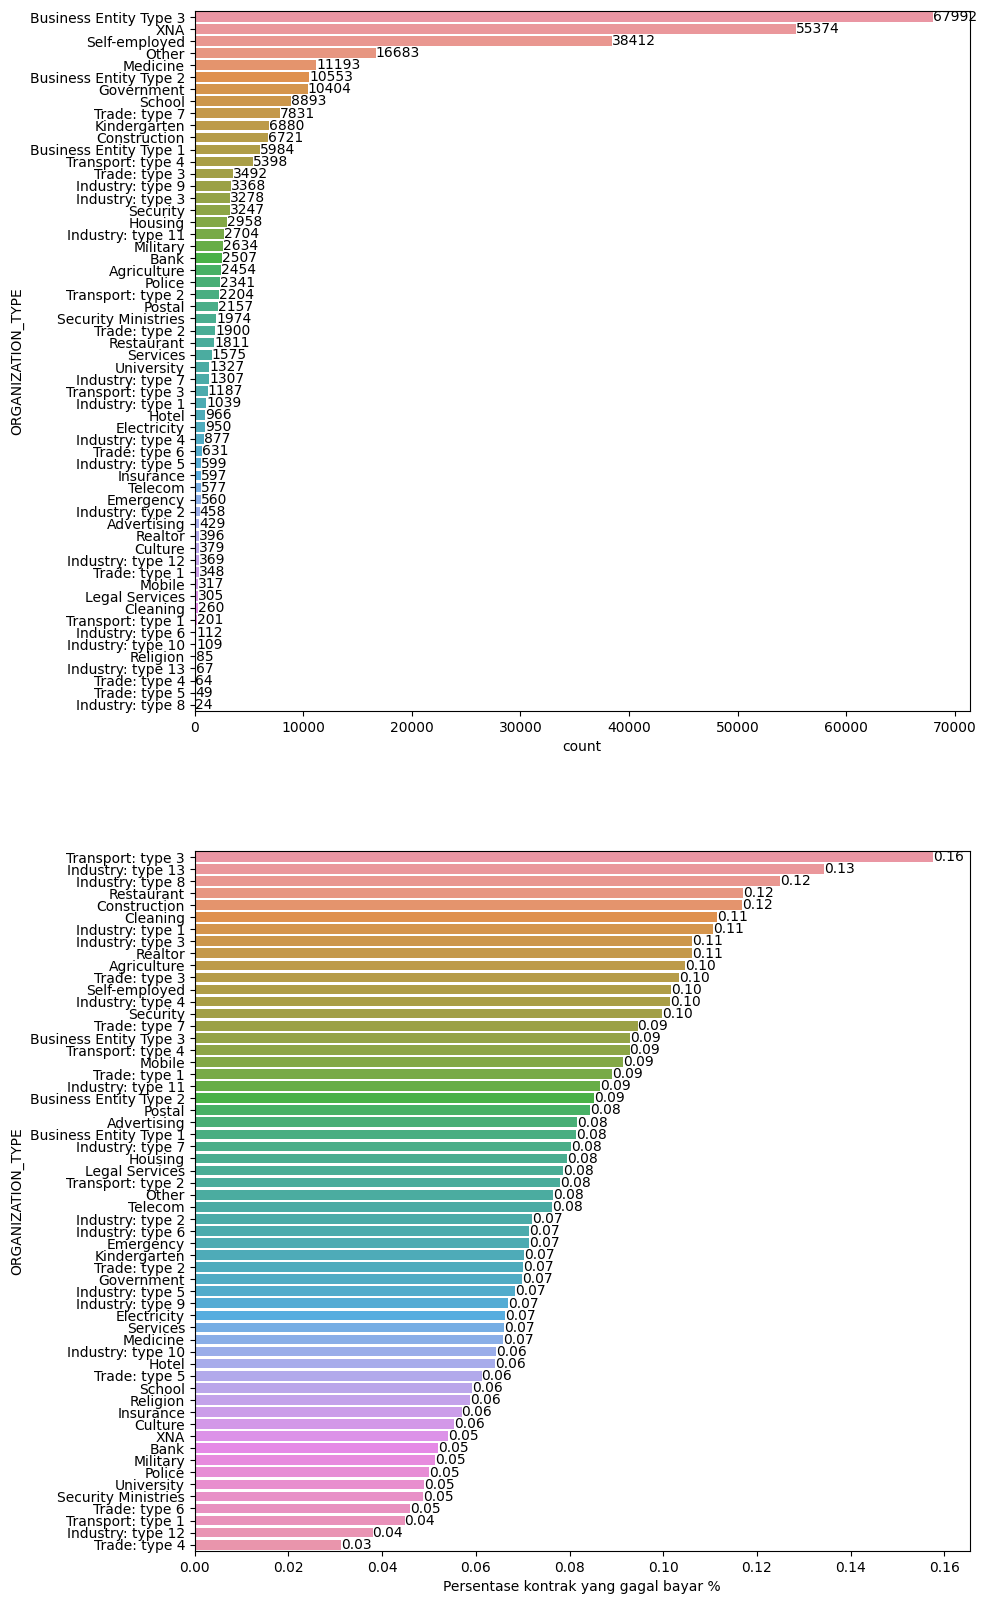

In [205]:
fig, ax = plt.subplots(2,1, figsize=(10,20))
sns.countplot(data=app_train, y='ORGANIZATION_TYPE', order=app_train["ORGANIZATION_TYPE"].value_counts().index, ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
plt.xlabel("Jumlah kontrak secara keseluruhan")

target = app_train[["ORGANIZATION_TYPE", "TARGET"]].groupby(["ORGANIZATION_TYPE"], as_index=False).mean().sort_values("TARGET", ascending=False)
sns.barplot(target, y="ORGANIZATION_TYPE", x="TARGET", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
plt.xlabel("Persentase kontrak yang gagal bayar %")

Text(0, 0.5, 'Persentase kontrak yang gagal bayar %')

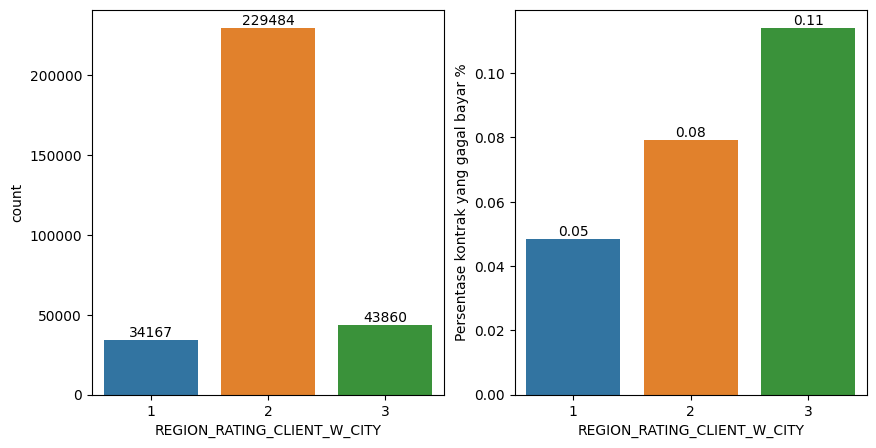

In [206]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=app_train, x="REGION_RATING_CLIENT_W_CITY", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
plt.ylabel("Jumlah kontrak secara keseluruhan")

target = app_train[["REGION_RATING_CLIENT_W_CITY", "TARGET"]].groupby(["REGION_RATING_CLIENT_W_CITY"], as_index=False).mean()
sns.barplot(target, x="REGION_RATING_CLIENT_W_CITY", y="TARGET", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
plt.ylabel("Persentase kontrak yang gagal bayar %")

Text(0.5, 0, 'Persentase kontrak yang gagal bayar %')

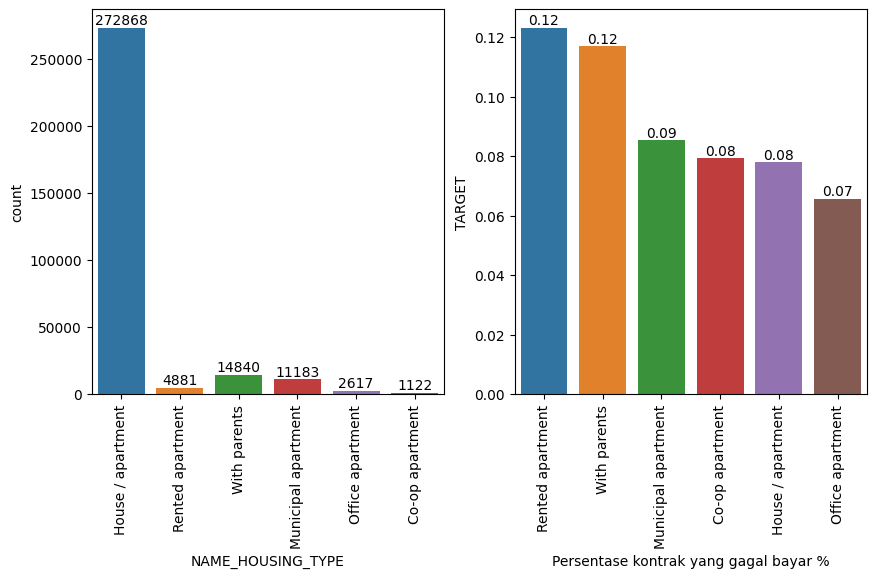

In [207]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=app_train, x="NAME_HOUSING_TYPE", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].tick_params(axis="x", rotation=90)
plt.xlabel("Jumlah kontrak secara keseluruhan")

target = app_train[["NAME_HOUSING_TYPE", "TARGET"]].groupby(["NAME_HOUSING_TYPE"], as_index=False).mean().sort_values("TARGET", ascending=False)
sns.barplot(target, x="NAME_HOUSING_TYPE", y="TARGET", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
ax[1].tick_params(axis="x", rotation=90)
plt.xlabel("Persentase kontrak yang gagal bayar %")

Text(0, 0.5, 'Persentase kontrak yang gagal bayar %')

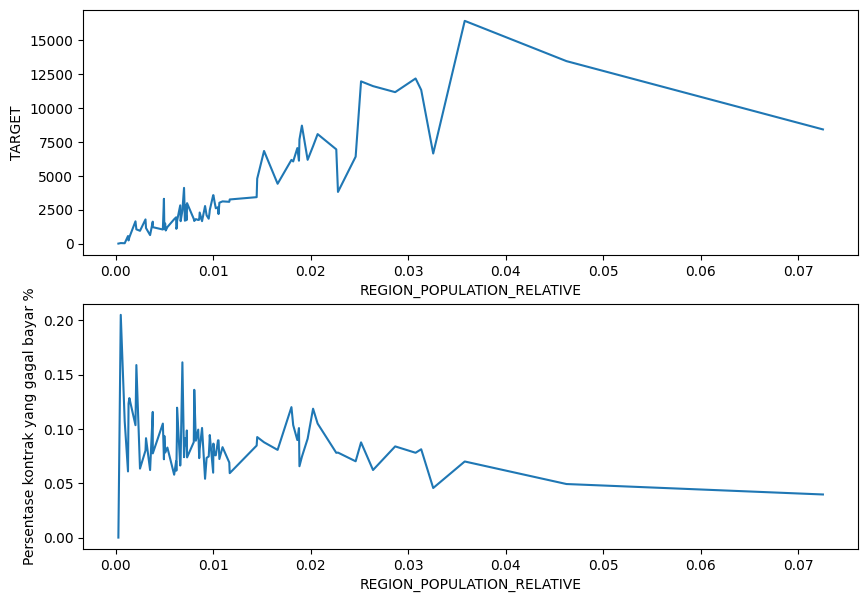

In [208]:
fig, ax = plt.subplots(2,1, figsize=(10,7))
count = app_train[["REGION_POPULATION_RELATIVE", "TARGET"]].groupby(["REGION_POPULATION_RELATIVE"], as_index=False).count()
sns.lineplot(data=count, x='REGION_POPULATION_RELATIVE', y="TARGET", ax=ax[0])
plt.ylabel("Jumlah kontrak secara keseluruhan")

mean = app_train[["REGION_POPULATION_RELATIVE", "TARGET"]].groupby(["REGION_POPULATION_RELATIVE"], as_index=False).mean()
sns.lineplot(mean, x="REGION_POPULATION_RELATIVE", y="TARGET", ax=ax[1])
plt.ylabel("Persentase kontrak yang gagal bayar %")

Text(0, 0.5, 'AMT_GOODS_PRICE')

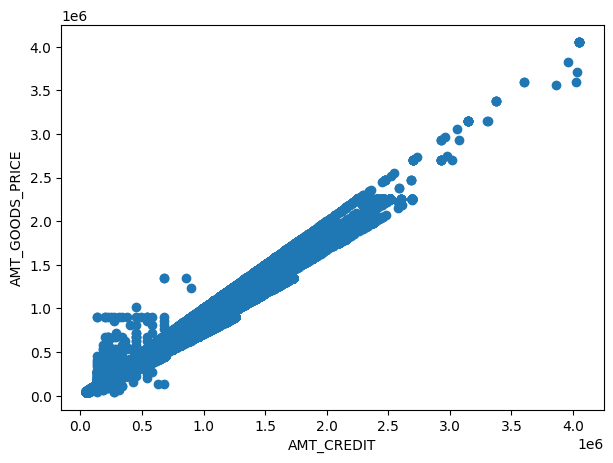

In [209]:
fig = plt.figure(figsize=(7,5))

plt.scatter(data=app_train, x="AMT_CREDIT", y="AMT_GOODS_PRICE")
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_GOODS_PRICE")

Text(0, 0.5, 'AMT_ANNUITY')

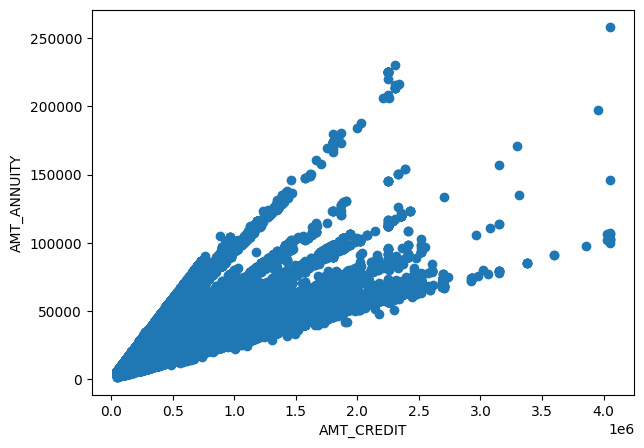

In [214]:
fig = plt.figure(figsize=(7,5))

plt.scatter(data=app_train, x="AMT_CREDIT", y="AMT_ANNUITY")
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_ANNUITY")

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Density'>

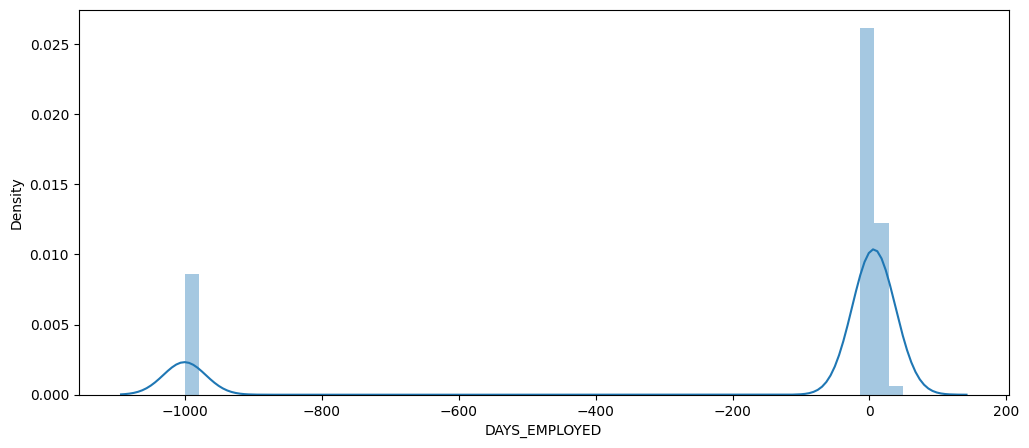

In [210]:
fig = plt.figure(figsize=(12,5))

day = app_train["DAYS_EMPLOYED"] / -365
sns.distplot(day.dropna())

<Axes: xlabel='EXT_SOURCE_1', ylabel='Density'>

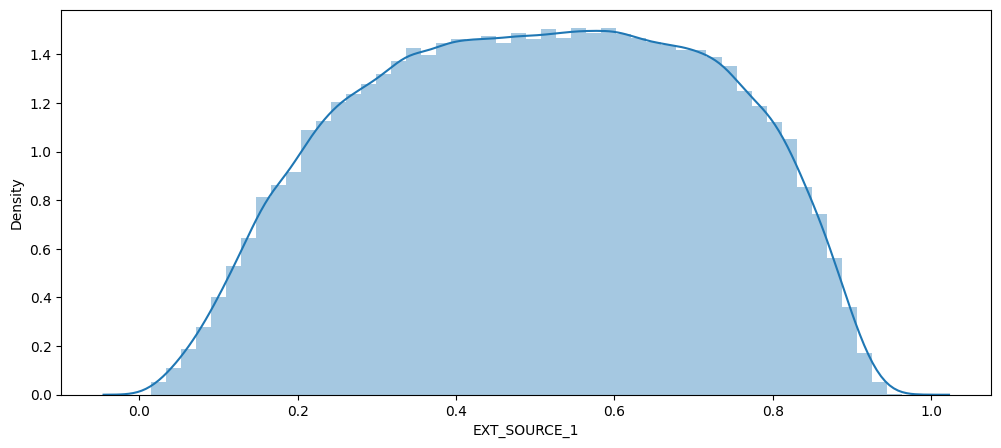

In [211]:
fig = plt.figure(figsize=(12,5))

sns.distplot(app_train["EXT_SOURCE_1"].dropna())

<Axes: xlabel='EXT_SOURCE_2', ylabel='Density'>

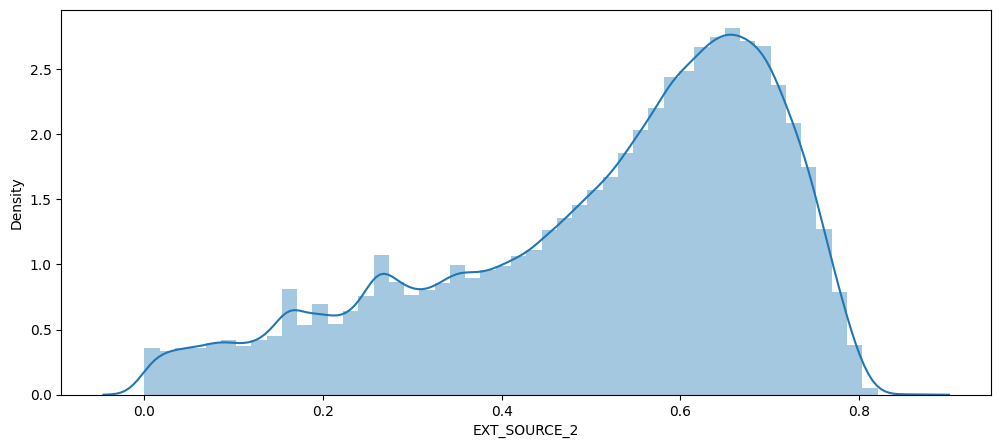

In [212]:
fig = plt.figure(figsize=(12,5))

sns.distplot(app_train["EXT_SOURCE_2"].dropna())

<Axes: xlabel='EXT_SOURCE_3', ylabel='Density'>

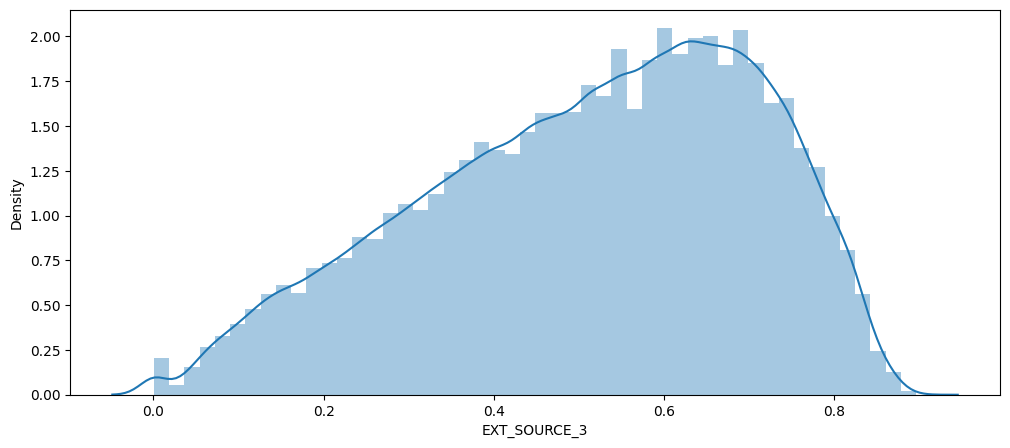

In [213]:
fig = plt.figure(figsize=(12,5))

sns.distplot(app_train["EXT_SOURCE_3"].dropna())

## Data Cleansing and Data Processing

In [135]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [136]:
#app_train.select_dtypes("int64").mean()

In [137]:
#app_train.select_dtypes("float64").mean()

In [138]:
print(app_train.duplicated().unique())
print(app_test.duplicated().unique())

[False]
[False]


In [139]:
def change_days(data):
  for col in data:
    if "DAYS" in col:
      data[col] = app_train[col] / -365

def change_outlier_days_emp(data):
  for i in data["DAYS_EMPLOYED"].index:
    if data["DAYS_EMPLOYED"].iloc[i] < 0:
      data["DAYS_EMPLOYED"].iloc[i] = 0
  #data[data["DAYS_EMPLOYED"] < 0]["DAYS_EMPLOYED"]

In [140]:
change_days(app_train)
change_days(app_test)

change_outlier_days_emp(app_train)
change_outlier_days_emp(app_test)

In [141]:
def remove_null_more_than_50_persen(data):
    missing_values = pd.DataFrame(data.isnull().sum()/data.shape[0])
    print("Total col missing values:", len(missing_values[missing_values.iloc[:,0] > 0]))
    print("Total col missing values more than 50%:", len(missing_values[missing_values.iloc[:,0] > 0.5]))
    print(missing_values.sort_values([0], ascending=False)[:10])
    
    #data.dropna(thresh=data.shape[0] * 0.5, how="all", axis=1, inplace=True)
    data.dropna(thresh=data.shape[0] * 0.5, axis=1, inplace=True)
    
def replace_null(data):
    for kolom in data:
        if data[kolom].dtypes == "object":
            data[kolom].fillna(data[kolom].mode()[0], inplace=True)
        else:
            data[kolom].fillna(data[kolom].median(), inplace=True)

In [142]:
remove_null_more_than_50_persen(app_train)
remove_null_more_than_50_persen(app_test)

Total col missing values: 67
Total col missing values more than 50%: 41
                                 0
COMMONAREA_MEDI           0.698723
COMMONAREA_AVG            0.698723
COMMONAREA_MODE           0.698723
NONLIVINGAPARTMENTS_MODE  0.694330
NONLIVINGAPARTMENTS_AVG   0.694330
NONLIVINGAPARTMENTS_MEDI  0.694330
FONDKAPREMONT_MODE        0.683862
LIVINGAPARTMENTS_MODE     0.683550
LIVINGAPARTMENTS_AVG      0.683550
LIVINGAPARTMENTS_MEDI     0.683550
Total col missing values: 65
Total col missing values more than 50%: 29
                                 0
COMMONAREA_AVG            0.687161
COMMONAREA_MODE           0.687161
COMMONAREA_MEDI           0.687161
NONLIVINGAPARTMENTS_AVG   0.684125
NONLIVINGAPARTMENTS_MODE  0.684125
NONLIVINGAPARTMENTS_MEDI  0.684125
FONDKAPREMONT_MODE        0.672842
LIVINGAPARTMENTS_AVG      0.672493
LIVINGAPARTMENTS_MODE     0.672493
LIVINGAPARTMENTS_MEDI     0.672493


In [143]:
replace_null(app_train)
replace_null(app_test)

In [144]:
app_train.select_dtypes("object").nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
EMERGENCYSTATE_MODE            2
dtype: int64

In [145]:
cols_int = app_train.select_dtypes(exclude = "object").columns.drop(["SK_ID_CURR", "TARGET"])
cols_object = app_train.select_dtypes(include = "object").columns
#print(cols_int)

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLA

In [146]:
le = LabelEncoder()
le_col = []
for col in cols_object:
  if app_train[col].nunique() <= 2:
      app_train[col] = le.fit_transform(app_train[col])
      app_test[col] = le.fit_transform(app_test[col])
      le_col.append(col)

#print(f"Total {len(le_col)} column  be Label Encoded", "" if len(le_col) == 0 else "is", (*le_col))
print(f"Total {len(le_col)} column  be Label Encoded", "" if len(le_col) == 0 else "is", (le_col))

Total 4 column  be Label Encoded is ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']


In [147]:
def menyamakan_kolom_train_dan_test(train, test):
    target = train["TARGET"]
    train, test = train.align(test, join="inner", axis=1)
    train["TARGET"] = target
    
    print("Shape data train:", *train.shape)
    print("Shape data test:", *test.shape)

In [148]:
app_train = pd.get_dummies(app_train, dummy_na=False, drop_first=False)
app_test = pd.get_dummies(app_test, dummy_na=False, drop_first=False)
menyamakan_kolom_train_dan_test(app_train, app_test)

Shape data train: 307511 187
Shape data test: 48744 186


## Feature Engineering

In [149]:
app_train.dtypes.value_counts()

uint8      118
int64       42
float64     30
dtype: int64

In [150]:
#sample = app_train.sample(n = int(len(app_train)*0.2)).copy()
sample_1 = app_train[app_train["TARGET"] == 1].copy()
total_sample_0 = (int(len(app_train)*0.2))-len(sample_1)
print(total_sample_0)
sample_0 = app_train[app_train["TARGET"] == 0].sample(n = total_sample_0, random_state = 1).copy()
sample = sample_0.merge(sample_1, how="outer")

x_sample = sample.drop(["SK_ID_CURR","TARGET"], axis=1)
y_sample = sample["TARGET"]

sample.TARGET.value_counts()/len(sample)

36677


0    0.596355
1    0.403645
Name: TARGET, dtype: float64

In [151]:
best = SelectKBest(score_func=chi2, k=10)
best_model = best.fit(x_sample, y_sample)
best_scores = pd.DataFrame(best_model.scores_)
best_columns = pd.DataFrame(x_sample.columns)
best_feature_scores = pd.concat([best_columns, best_scores], axis=1)
best_feature_scores.columns = ["Feature", "Score"]
best_feature_scores.sort_values("Score", ascending=False)
best_features = pd.DataFrame(best_feature_scores.sort_values("Score", ascending=False)[0:50].Feature)

In [152]:
etc = ExtraTreesClassifier()
etc = etc.fit(x_sample, y_sample)
etc_scores = pd.DataFrame(etc.feature_importances_)
etc_columns = pd.DataFrame(x_sample.columns)
etc_feature_scores = pd.concat([etc_columns, etc_scores], axis=1)
etc_feature_scores.columns = ["Feature", "Score"]
etc_feature_scores.sort_values("Score", ascending=False)
etc_features = pd.DataFrame(etc_feature_scores.sort_values("Score", ascending=False)[0:50].Feature)

In [166]:
importance_feature = np.array(best_features.merge(etc_features, how="outer").Feature)
importance_feature

array(['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA',
       'EXT_SOURCE_2', 'CODE_GENDER_M', 'REG_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'EXT_SOURCE_3',
       'NAME_INCOME_TYPE_Working', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'CODE_GENDER_F', 'NAME_CONTRACT_TYPE',
       'FLAG_DOCUMENT_6', 'AMT_REQ_CREDIT_BUREAU_MON',
       'ORGANIZATION_TYPE_Self-employed', 'OCCUPATION_TYPE_Drivers',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_WORK_PHONE',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_HOUSING_TYPE_With parents',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'OCCUPATION_TYPE_Low-skill Laborers', 'HOUR_APPR_PROCESS_START',
       'NAME_INCOME_TYPE_State servant', 'FLAG_DOCUME

## Hyperparameter

In [154]:
#"""
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

lr = LogisticRegression()
param_grid_lr = {
    "solver" : ["newton-cg", "lbfgs"],
    "penalty" : ["none", "l2"],
    "C" : [1e-2, 1e-1, 1e0, 1e1, 1e2]
}

search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, scoring="accuracy", cv=cv)#, n_jobs=-1)
result_lr = search_lr.fit(x_sample[importance_feature], y_sample)
print("Best score for Logistic Regression:", result_lr.best_score_)
print("Best hyperparameters for Logistic Regression:", result_lr.best_params_)
#"""

Best score for Logistic Regression: 0.6901238302391967
Best hyperparameters for Logistic Regression: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [155]:
dtc = DecisionTreeClassifier(random_state=1)
param_grid_dtc = {
    "max_features" : ["None", "sqrt", "log2"],
    "max_depth" : [4, 5, 6, 7, 8],
    "criterion" : ["gini", "entropy"]
}

search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, scoring="accuracy", cv=cv)
result_dtc = search_dtc.fit(x_sample[importance_feature], y_sample)
print("Best score for Decision Tree:", result_dtc.best_score_)
print("Best hyperparameters for Decision Tree:", result_dtc.best_params_)
#"""

Best score for Decision Tree: 0.6462229721557439
Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


In [156]:
#"""
rfc = RandomForestClassifier(random_state=1)
param_grid_rfc = {
    "n_estimators" : [50, 100, 200],
    "max_features" : ["None", "sqrt", "log2"],
    "max_depth" : [4, 5, 6, 7, 8],
    "criterion" : ["gini", "entropy"]
}

search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, scoring="accuracy", cv=cv)
result_rfc = search_rfc.fit(x_sample[importance_feature], y_sample)
print("Best score for Random FOrest:", result_rfc.best_score_)
print("Best hyperparameters for Random Forest:", result_rfc.best_params_)
#"""

Best score for Random FOrest: 0.683457345988792
Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


## Standardization

In [157]:
for i in cols_int:
  scale = StandardScaler().fit(app_train[[i]])
  app_train[i] = scale.transform(app_train[[i]])
  app_test[i] = scale.transform(app_test[[i]])

## Split Data

In [158]:
X = app_train[importance_feature]
y = app_train["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Implementation Machine Learning

In [159]:
y_test.value_counts()

0    56533
1     4970
Name: TARGET, dtype: int64

In [160]:
#"""
lr1 = LogisticRegression(random_state=1, solver=result_lr.best_params_["solver"], penalty=result_lr.best_params_["penalty"], C=result_lr.best_params_["C"])
lr1.fit(X_train, y_train)
pred_lr = lr1.predict(X_test)

print("Accuracy for Logistic Regression on CV data:", accuracy_score(y_test, pred_lr))
print("Precision for Logistic Regression on CV data:", precision_score(y_test, pred_lr))
print("Recall for Logistic Regression on CV data:", recall_score(y_test, pred_lr))
print("F1 for Logistic Regression on CV data:", f1_score(y_test, pred_lr))
print("Roc Auc for Logistic Regression on CV data:", roc_auc_score(y_test, pred_lr))
print("Confusion Matric for Logistic Regression on CV data:", confusion_matrix(y_test, pred_lr))
#"""

Accuracy for Logistic Regression on CV data: 0.9194998617953596
Precision for Logistic Regression on CV data: 0.6
Recall for Logistic Regression on CV data: 0.011468812877263581
F1 for Logistic Regression on CV data: 0.02250740375123396
Roc Auc for Logistic Regression on CV data: 0.505398319551327
Confusion Matric for Logistic Regression on CV data: [[56495    38]
 [ 4913    57]]


In [161]:
#"""
op_lr = lr1.predict_proba(app_test[importance_feature])
df_lr = pd.DataFrame(app_test["SK_ID_CURR"])
df_lr["TARGET"] = np.round(op_lr[:, 0], 2)
df_lr.to_csv("LogisticRegression.csv", index=False)
#df_lr["TARGET"].value_counts()
#"""

In [162]:
#"""
dtc1 = DecisionTreeClassifier(random_state=1, max_features=result_dtc.best_params_["max_features"],
                              max_depth=result_dtc.best_params_["max_depth"], criterion=result_dtc.best_params_["criterion"])
dtc1.fit(X_train, y_train)
pred_dtc = dtc1.predict(X_test)

print("Accuracy for Decision Tree on CV data:", accuracy_score(y_test, pred_dtc))
print("Precision for Decision Tree on CV data:", precision_score(y_test, pred_dtc))
print("Recall for Decision Tree on CV data:", recall_score(y_test, pred_dtc))
print("F1 for Decision Tree on CV data:", f1_score(y_test, pred_dtc))
print("Roc Auc for Decision Tree on CV data:", roc_auc_score(y_test, pred_dtc))
print("Confusion Matric for Decision Tree on CV data:", confusion_matrix(y_test, pred_dtc))
#"""

Accuracy for Decision Tree on CV data: 0.9189795619725867
Precision for Decision Tree on CV data: 0.19047619047619047
Recall for Decision Tree on CV data: 0.0008048289738430583
F1 for Decision Tree on CV data: 0.0016028851933480262
Roc Auc for Decision Tree on CV data: 0.5002520598268115
Confusion Matric for Decision Tree on CV data: [[56516    17]
 [ 4966     4]]


In [163]:
#"""
op_dtc = dtc1.predict_proba(app_test[importance_feature])
df_dtc = pd.DataFrame(app_test["SK_ID_CURR"])
df_dtc["TARGET"] = np.round(op_dtc[:,0], 2)
df_dtc.to_csv("DecisionTree.csv", index=False)
#df_dtc["TARGET"].value_counts()
#"""

In [164]:
#"""
rfc1 = RandomForestClassifier(random_state=1, n_estimators=result_rfc.best_params_["n_estimators"], max_features=result_rfc.best_params_["max_features"],
                              max_depth=result_rfc.best_params_["max_depth"], criterion=result_rfc.best_params_["criterion"])
rfc1.fit(X_train, y_train)
pred_rfc = rfc1.predict(X_test)

print("Accuracy for Random Forest on CV data:", accuracy_score(y_test, pred_rfc))
print("Precision for Random Forest on CV data:", precision_score(y_test, pred_rfc))
print("Recall for Random Forest on CV data:", recall_score(y_test, pred_rfc))
print("F1 for Random Forest on CV data:", f1_score(y_test, pred_rfc))
print("Roc Auc for Random Forest on CV data:", roc_auc_score(y_test, pred_rfc))
print("Confusion Matric for Random Forest on CV data:", confusion_matrix(y_test, pred_rfc))
#"""

Accuracy for Random Forest on CV data: 0.9191909337755881
Precision for Random Forest on CV data: 0.0
Recall for Random Forest on CV data: 0.0
F1 for Random Forest on CV data: 0.0
Roc Auc for Random Forest on CV data: 0.5
Confusion Matric for Random Forest on CV data: [[56533     0]
 [ 4970     0]]


In [165]:
#"""
op_rfc = rfc1.predict_proba(app_test[importance_feature])
df_rfc = pd.DataFrame(app_test["SK_ID_CURR"])
df_rfc["TARGET"] = np.round(op_rfc[:,0], 2)
df_rfc.to_csv("RandomForest.csv", index=False)
#df_rfc["TARGET"].value_counts()
#"""